# Offshore Viz Data Exploration

## Import Required Packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data Source

In [23]:
base_file = pd.read_csv('Data/offshore_agg_data_alltime.csv')
base_file.head()

,c_n_sourceID,c_type,c_n_countries_norm,b_n_jurisdiction_description_norm,count
0,Bahamas Leaks,individual,Angola,Bahamas,1
1,Panama Papers,individual,Lithuania,Seychelles,1
2,Panama Papers,individual,Lithuania,Samoa,1
3,Panama Papers,individual,Liechtenstein,British Anguilla,1
4,Panama Papers,individual,Libya,Panama,1


## Data Preprocessing

#### Change Column Names

In [24]:
base_file.columns = ['Source','Type','Country','Offshore_Location','Count']

#### Aggregate Data

In [25]:
base_file_pro = pd.DataFrame([])
for name, group in base_file.groupby(['Country','Offshore_Location']):
    base_file_pro = base_file_pro.append([list(name + (group['Count'].sum(),))])
base_file_pro.columns=['Country','Offshore_Location','Count']
base_file_pro.head()

,Country,Offshore_Location,Count
0,Albania,Bahamas,1
0,Albania,British Anguilla,4
0,Albania,British Virgin Islands,13
0,Albania,Cayman Islands,3
0,Albania,Jersey,1


## Data Exploration

#### Simple Count

In [38]:
print("Countries: %d\n" %len(base_file_pro.Country.unique()))
print("Offshore_Locations: %d\n" %len(base_file_pro.Offshore_Location.unique()))
print(base_file_pro.Count.describe())

Countries: 185

Offshore_Locations: 38

count     1432.000000
mean        99.358939
std        798.363523
min          1.000000
25%          2.000000
50%          5.000000
75%         21.000000
max      18349.000000
Name: Count, dtype: float64


#### Pivot Table

In [31]:
pd.pivot_table(base_file_pro, values='Count', index=['Country'],columns=['Offshore_Location']).fillna(0).head()

Offshore_Location,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman Islands,Cook Islands,Costa Rica,Cyprus,...,Saint Kitts and Nevis,Samoa,Seychelles,Singapore,St. Lucia,State of Delaware,United Kingdom,United States Of America,Vanuatu,Wyoming
Country,,,,,,,,,,,,,,,,,,,,,
Albania,1.0,0.0,0.0,4.0,13.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,1.0,2.0,2.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Samoa,4.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,3.0,0.0,0.0,0.0,13.0,0.0,2.0,2.0,0.0,0.0,...,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,1.0,0.0,0.0,3.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Bar Chart

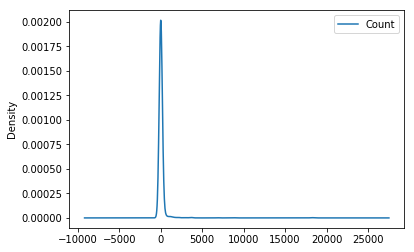

In [43]:
base_file_pro.plot.kde()
plt.show()